Copy of [this notebook by Mehdi at Kaggle](https://www.kaggle.com/mehdi83/autoencoders)

In [2]:
import numpy as np
import pandas as pd 

import numpy as np
np.random.seed(13)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D
from keras.layers import Dropout, Flatten, UpSampling2D, Reshape
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
import os

In [3]:
train = pd.read_csv("../content/sample_data/mnist_train_small.csv")
test = pd.read_csv("../content/sample_data/mnist_test.csv")

In [4]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
x_test = (test.iloc[:,1:].values).astype('float32')
y_test = test.iloc[:,0].values.astype('int32')

In [5]:
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)    
    plt.imshow(data.reshape(size, size),cmap="viridis")
    #plt.gray()

In [6]:
input_unit_size = 28*28
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_train /= 255

In [7]:
# Basic no frills model
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation='relu')(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adadelta')

In [42]:
# Basic some frills model
inputs = Input(shape=(input_unit_size,))
x = Reshape((28,28,1))(inputs)
x = Conv2D(64, 4, activation="relu",padding="same")(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128, 2, activation="relu",padding="same")(x)
x = MaxPooling2D(2)(x)

#x = Flatten()(x)
#

x = UpSampling2D(2)(x)
x = Conv2DTranspose(128, 2, activation="relu",padding="same")(x)
x = UpSampling2D(2)(x)
x = Conv2DTranspose(64, 4, activation="relu",padding="same")(x)
x = Flatten()(x)
outputs =  Dense(input_unit_size, activation="relu")(x)
#outputs = Reshape((28,28,1))(x)

model_transpose = Model(inputs=inputs, outputs=outputs)
model_transpose.compile(loss='binary_crossentropy', optimizer='adadelta')

In [43]:
model_transpose.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_23 (UpSampling (None, 14, 14, 128)       0  

In [44]:
#model.summary()
model_transpose.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
79/79 [==============================] - 6s 23ms/step - loss: 1.1204
Epoch 2/10
79/79 [==============================] - 2s 22ms/step - loss: 0.8780
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.7693
Epoch 4/10
79/79 [==============================] - 2s 22ms/step - loss: 0.7012
Epoch 5/10
79/79 [==============================] - 2s 22ms/step - loss: 0.6481
Epoch 6/10
79/79 [==============================] - 2s 22ms/step - loss: 0.6055
Epoch 7/10
79/79 [==============================] - 2s 22ms/step - loss: 0.5748
Epoch 8/10
79/79 [==============================] - 2s 22ms/step - loss: 0.5489
Epoch 9/10
79/79 [==============================] - 2s 22ms/step - loss: 0.5278
Epoch 10/10
79/79 [==============================] - 2s 22ms/step - loss: 0.5107


In [ ]:
show_size = 10
total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(x_train[total], show_size, show_size, total+1)
        total+=1
plt.show()

In [ ]:
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[1].output])

hidden_outputs = get_layer_output([x_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

In [ ]:
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[2].output])

last_outputs = get_layer_output([x_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

In [11]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [12]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(19999, 784)
(9999, 784)


In [13]:
# Model compilation
autoencoder = Model(inputs=(input_img), outputs=(decoded))
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               1011

In [14]:
encoder = Model(inputs=input_img, outputs=encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder1 = autoencoder.layers[-3]
decoder2 = autoencoder.layers[-2]
decoder3 = autoencoder.layers[-1]

decoder = Model(inputs=encoded_input, outputs=decoder3(decoder2(decoder1(encoded_input))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
79/79 [==============================] - 1s 9ms/step - loss: 0.4501 - val_loss: 3362.4255
Epoch 2/20
79/79 [==============================] - 0s 4ms/step - loss: 0.2264 - val_loss: -3563.4055
Epoch 3/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1801 - val_loss: -9092.8770
Epoch 4/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1598 - val_loss: -14503.7734
Epoch 5/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1471 - val_loss: -17747.5859
Epoch 6/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1392 - val_loss: -20516.4941
Epoch 7/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1330 - val_loss: -22431.7363
Epoch 8/20
79/79 [==============================] - 0s 4ms/step - loss: 0.1277 - val_loss: -25158.4414
Epoch 9/20
79/79 [==============================] - 1s 7ms/step - loss: 0.1239 - val_loss: -26192.0586
Epoch 10/20
79/79 [==============================] - 0s 4ms/step - loss: 0.12

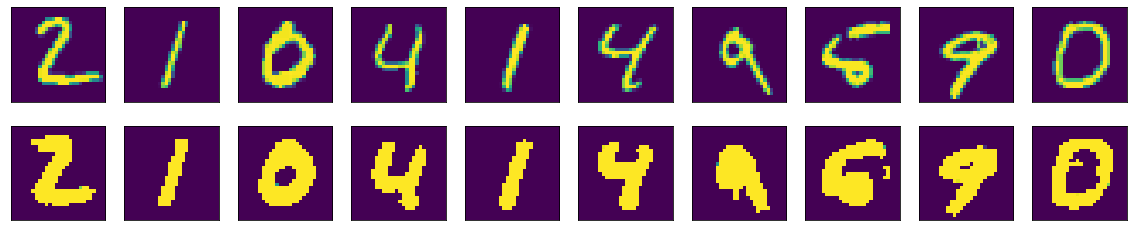

In [39]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28),cmap="viridis")
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap="viridis")
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()